In [63]:
import pandas as pd
import numpy as np

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df= pd.read_csv("/content/drive/MyDrive/pima diabetes data set/edited framingham - Copy.csv")
df.head(100)

,hypoglycemia,heartRate,glucose
0,NaN,80.0,77.0
1,NaN,95.0,76.0
2,NaN,75.0,70.0
3,NaN,65.0,103.0
4,NaN,85.0,85.0
...,...,...,...
95,NaN,60.0,96.0
96,NaN,88.0,126.0
97,NaN,60.0,72.0
98,NaN,75.0,120.0


In [32]:
df["heartRate"].isnull().sum()



1

In [33]:
df["heartRate"]=df["heartRate"].replace(np.nan, 75)

In [34]:
df["heartRate"].isnull().sum()

0

In [35]:
df["glucose"].isnull().sum()

388

In [36]:
df["glucose"].mean()

81.96365524402907

In [37]:
df['glucose'] = df['glucose'].replace(np.nan, 82)

In [38]:
df["glucose"].isnull().sum()

0

In [39]:
for i in range(len(df)):
  if df['glucose'].values[i] < 70.0:
     df['hypoglycemia'].values[i]=1
  else:
     df['hypoglycemia'].values[i]=0
df.head(20) 

,hypoglycemia,heartRate,glucose
0,0.0,80.0,77.0
1,0.0,95.0,76.0
2,0.0,75.0,70.0
3,0.0,65.0,103.0
4,0.0,85.0,85.0
5,0.0,77.0,99.0
6,0.0,60.0,85.0
7,0.0,79.0,78.0
8,0.0,76.0,79.0
9,0.0,93.0,88.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hypoglycemia  4240 non-null   float64
 1   heartRate     4240 non-null   float64
 2   glucose       4240 non-null   float64
dtypes: float64(3)
memory usage: 99.5 KB


In [41]:

df.isnull().values.any()

False

In [42]:
df.corr()

,hypoglycemia,heartRate,glucose
hypoglycemia,1.000000,-0.059277,-0.367567
heartRate,-0.059277,1.000000,0.089397
glucose,-0.367567,0.089397,1.000000


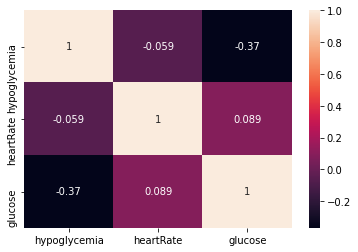

In [ ]:
import seaborn as sns

correlationmatrix= df.corr()
top_correlated_features= correlationmatrix.index


sns.heatmap(df[top_correlated_features].corr(), annot= True)


In [43]:
hypoglycemia_yes_count= len(df.loc[df['hypoglycemia']==1])
hypoglycemia_no_count= len(df.loc[df['hypoglycemia']==0])
print(hypoglycemia_yes_count, hypoglycemia_no_count)

746 3494


In [46]:
from sklearn.model_selection import train_test_split
X= df.iloc[:, 1:3]
y=df.iloc[:,0]
print(X.head(30))
print(y.head(30))

    heartRate  glucose
0        80.0     77.0
1        95.0     76.0
2        75.0     70.0
3        65.0    103.0
4        85.0     85.0
5        77.0     99.0
6        60.0     85.0
7        79.0     78.0
8        76.0     79.0
9        93.0     88.0
10       75.0     76.0
11       72.0     61.0
12       98.0     64.0
13       65.0     84.0
14       85.0     82.0
15       95.0     70.0
16       64.0     72.0
17       80.0     89.0
18       75.0     78.0
19       85.0     65.0
20       72.0     85.0
21       70.0     82.0
22       70.0    113.0
23       71.0     75.0
24       75.0     83.0
25       62.0     66.0
26       65.0     82.0
27       73.0     83.0
28       85.0     65.0
29       72.0     74.0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    1.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    1.0
26    0.0
27    0.0
28    1

In [47]:
from sklearn.impute import SimpleImputer
imputer_obj= SimpleImputer(missing_values=0, strategy= "mean")
X = imputer_obj.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [50]:
predictions= random_forest_model.predict(X_test)
from sklearn import metrics
print("Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, predictions)))

Accuracy=  1.000


In [51]:
params= {
    "learning_rate"     : [0.05, 0.1, 0.10, 0.15, 0.2, 0.25, 0.3],
    "max_depth"         : [3,4,6,7,8,10, 12,15],
    "min_child_weight"  : [1,3,5,7],
    "gamma"             : [0.0,0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree"  : [0.3,0.4, 0.5, 0.6, 0.7]
}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost

In [53]:
classifier= xgboost.XGBClassifier()

In [54]:
random_search= RandomizedSearchCV(classifier, 
                                  param_distributions=params, 
                                  n_iter=10, 
                                  scoring='roc_auc', 
                                  n_jobs=-1, 
                                  cv=5,
                                  verbose=3)

In [55]:
#Lets define a time function to check on time-lapse
def timer(start_time= None):
  if not start_time:
    start_time= datetime.now()
    return start_time

  elif start_time: 
    thour, temp_sec= divmod((datetime.now()- start_time).total_seconds(),3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds' %(thour, tmin, round(tsec, 2)))

In [56]:
from datetime import datetime

start_time= timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.8s



 Time taken: 0 hours 0 minutes and 4.11 seconds


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.0s finished


In [57]:
def timer(start_time= None):
  if not start_time:
    start_time= datetime.now()
    return start_time

  elif start_time: 
    thour, temp_sec= divmod((datetime.now()- start_time).total_seconds(),3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds' %(thour, tmin, round(tsec, 2)))


In [58]:
from datetime import datetime

start_time= timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Time taken: 0 hours 0 minutes and 2.66 seconds


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


In [59]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
final_classifier= xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
final_classifier.fit(X_train, y_train)

y_pred= final_classifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
score= accuracy_score(y_test, y_pred)

print(cm)
print(score)

[[1040    0]
 [   0  232]]
1.0
